# Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'2.2.2'

## Series

### Создание

* из списка

In [4]:
salaries = pd.Series(data=[400, 300, 200, 250, 100]) 
salaries

0    400
1    300
2    200
3    250
4    100
dtype: int64

In [5]:
salaries = pd.Series(data=[400, 300, 200, 250, 100], 
                     index=['Max', 'Ann', 'Charles', 'John', 'Mike']) 
salaries                                                               

Max        400
Ann        300
Charles    200
John       250
Mike       100
dtype: int64

In [6]:
salaries.index

Index(['Max', 'Ann', 'Charles', 'John', 'Mike'], dtype='object')

In [7]:
salaries.values

array([400, 300, 200, 250, 100])

* из numpy-массива

In [8]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.666967
b    0.125402
c    0.009305
d    0.492432
e   -1.421526
dtype: float64

* из словаря

In [8]:
d = {'b': 1, 'a': 0, 'c': 2}

In [9]:
s = pd.Series(d)
s

b    1
a    0
c    2
dtype: int64

* из скалярного значения

In [10]:
s =  pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])
s

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### Доступ к элементам и операции над ними

In [11]:
salaries

Max        400
Ann        300
Charles    200
John       250
Mike       100
dtype: int64

In [12]:
salaries[0]

400

In [13]:
salaries[3]

250

In [14]:
salaries['Max']

400

In [15]:
salaries['John']

250

In [16]:
salaries[2:]

Charles    200
John       250
Mike       100
dtype: int64

In [17]:
salaries[2:].to_numpy()

array([200, 250, 100], dtype=int64)

In [18]:
salaries[2:].values

array([200, 250, 100], dtype=int64)

In [19]:
salaries

Max        400
Ann        300
Charles    200
John       250
Mike       100
dtype: int64

In [20]:
salaries['Ann'] = 350

In [21]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int64

In [22]:
salaries[['Max', 'John']]

Max     400
John    250
dtype: int64

In [23]:
salaries['Ivan']

KeyError: 'Ivan'

In [24]:
val = salaries.get('Ivan')
val

In [25]:
val is None

True

In [26]:
val = salaries.get('Ivan', default='undefined')
val

'undefined'

### Атрибуты 

* тип данных

In [27]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int64

In [28]:
salaries.dtype

dtype('int64')

In [29]:
salaries.astype('int32')

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int32

In [30]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int64

In [31]:
salaries = salaries.astype('int32')
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int32

* имя

In [32]:
pd.DataFrame(salaries)

,0
Max,400
Ann,350
Charles,200
John,250
Mike,100


In [33]:
salaries.name = 'salaries'

In [34]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
Name: salaries, dtype: int32

In [35]:
pd.DataFrame(salaries)

,salaries
Max,400
Ann,350
Charles,200
John,250
Mike,100


* размер

In [36]:
salaries.shape

(5,)

In [37]:
len(salaries)

5

### проверка на пропущенные значения

Starting from pandas 1.0, an experimental pd.NA value (singleton) is available to represent scalar missing values. 

At this moment, it is used in the nullable integer, boolean and dedicated string data types as the missing value indicator.

The goal of pd.NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type).

![](https://xkcd.ru/i/927_v4.png)

In [38]:
pd.NA

<NA>

In [39]:
np.isnan(np.nan), np.isnan(pd.NA)

(True, <NA>)

In [40]:
np.isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [41]:
pd.isna(None), pd.isna(np.nan), pd.isna(pd.NA)

(True, True, True)

In [42]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
Name: salaries, dtype: int32

In [43]:
salaries['Ivan'] = None

In [44]:
salaries

Max         400
Ann         350
Charles     200
John        250
Mike        100
Ivan       None
Name: salaries, dtype: object

In [45]:
salaries.isna()

Max        False
Ann        False
Charles    False
John       False
Mike       False
Ivan        True
Name: salaries, dtype: bool

In [46]:
mask = salaries.isna()
salaries[mask]

Ivan    None
Name: salaries, dtype: object

In [47]:
salaries[salaries.isna()]

Ivan    None
Name: salaries, dtype: object

In [48]:
salaries

Max         400
Ann         350
Charles     200
John        250
Mike        100
Ivan       None
Name: salaries, dtype: object

In [49]:
salaries.index

Index(['Max', 'Ann', 'Charles', 'John', 'Mike', 'Ivan'], dtype='object')

In [50]:
salaries[['Max', 'Ann', 'Ivan', 'Charles', 'John', 'Mike']]

Max         400
Ann         350
Ivan       None
Charles     200
John        250
Mike        100
Name: salaries, dtype: object

## DataFrame

![](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

### Создание

* явное указание параметров

In [51]:
df = pd.DataFrame(data=np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


* из словаря

In [52]:
d = {'A': np.random.random(5), 
     'B': [1,2,3,4,5], 
     'C': np.arange(5) > 2}
df2 = pd.DataFrame(d)
df2

,A,B,C
0,0.699356,1,False
1,0.202923,2,False
2,0.178491,3,False
3,0.064682,4,True
4,0.161841,5,True


* из списка словарей

In [53]:
df3 = pd.DataFrame([{'A': 1, 'B': 2}, {'A': 2, 'C': 3}])
df3

,A,B,C
0,1,2.0,NaN
1,2,NaN,3.0


In [54]:
df3 = pd.DataFrame([{'A': 1, 'B': 2}, {'A': 2, 'C': 3, 'D':10}])
df3

,A,B,C,D
0,1,2.0,NaN,NaN
1,2,NaN,3.0,10.0


* из Series

In [55]:
salaries

Max         400
Ann         350
Charles     200
John        250
Mike        100
Ivan       None
Name: salaries, dtype: object

In [56]:
df4 = pd.DataFrame(salaries)
df4

,salaries
Max,400
Ann,350
Charles,200
John,250
Mike,100
Ivan,None


### Доступ к элементам

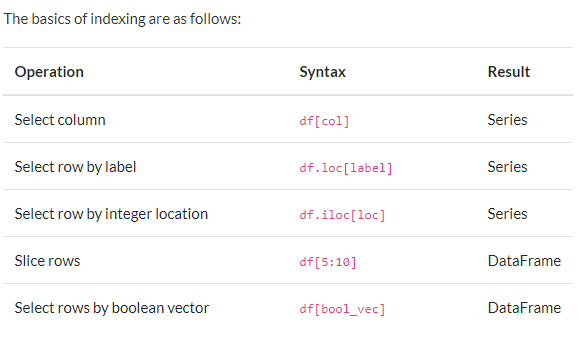

In [57]:
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [58]:
df['f2']

o1    0.437943
o2    0.461918
o3   -1.353887
o4    0.276831
o5    1.311054
Name: f2, dtype: float64

In [59]:
df['o2']

KeyError: 'o2'

In [60]:
df[['f2', 'f3']]

,f2,f3
o1,0.437943,-0.044155
o2,0.461918,-1.326122
o3,-1.353887,1.036284
o4,0.276831,0.201477
o5,1.311054,-0.861527


In [61]:
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [62]:
df[1:4]

,f1,f2,f3
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477


In [63]:
df[1:]

,f1,f2,f3
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [64]:
df.loc['o2']

f1    0.463268
f2    0.461918
f3   -1.326122
Name: o2, dtype: float64

In [65]:
df.loc[['o2', 'o3']]

,f1,f2,f3
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284


In [66]:
df.loc[['o2', 'o3'],'f2']

o2    0.461918
o3   -1.353887
Name: f2, dtype: float64

In [67]:
df.loc[['o2', 'o3'],['f2', 'f3']]

,f2,f3
o2,0.461918,-1.326122
o3,-1.353887,1.036284


In [68]:
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [69]:
df.iloc[1,1:]

f2    0.461918
f3   -1.326122
Name: o2, dtype: float64

In [70]:
df.iloc[1:3,1:]

,f2,f3
o2,0.461918,-1.326122
o3,-1.353887,1.036284


### Изменение, удаление, вставка новых значений

In [71]:
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,0.463268,0.461918,-1.326122
o3,0.288240,-1.353887,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [72]:
df.loc['o3', 'f2']

-1.3538867360332043

In [73]:
df.loc['o3', 'f2'] = 100

In [74]:
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,0.463268,0.461918,-1.326122
o3,0.288240,100.000000,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [75]:
df.loc['o2'] = [1,2,3]

In [76]:
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,1.000000,2.000000,3.000000
o3,0.288240,100.000000,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527


In [77]:
df.loc['o6'] = [4,5,6]
df

,f1,f2,f3
o1,0.291625,0.437943,-0.044155
o2,1.000000,2.000000,3.000000
o3,0.288240,100.000000,1.036284
o4,0.179988,0.276831,0.201477
o5,1.343209,1.311054,-0.861527
o6,4.000000,5.000000,6.000000


In [78]:
df['f4'] = 0

In [79]:
df

,f1,f2,f3,f4
o1,0.291625,0.437943,-0.044155,0
o2,1.000000,2.000000,3.000000,0
o3,0.288240,100.000000,1.036284,0
o4,0.179988,0.276831,0.201477,0
o5,1.343209,1.311054,-0.861527,0
o6,4.000000,5.000000,6.000000,0


In [80]:
df['f4'] = df['f1'] * df['f2']
df

,f1,f2,f3,f4
o1,0.291625,0.437943,-0.044155,0.127715
o2,1.000000,2.000000,3.000000,2.000000
o3,0.288240,100.000000,1.036284,28.824008
o4,0.179988,0.276831,0.201477,0.049826
o5,1.343209,1.311054,-0.861527,1.761019
o6,4.000000,5.000000,6.000000,20.000000


In [81]:
df.drop('f2', axis=1)

,f1,f3,f4
o1,0.291625,-0.044155,0.127715
o2,1.000000,3.000000,2.000000
o3,0.288240,1.036284,28.824008
o4,0.179988,0.201477,0.049826
o5,1.343209,-0.861527,1.761019
o6,4.000000,6.000000,20.000000


In [82]:
df

,f1,f2,f3,f4
o1,0.291625,0.437943,-0.044155,0.127715
o2,1.000000,2.000000,3.000000,2.000000
o3,0.288240,100.000000,1.036284,28.824008
o4,0.179988,0.276831,0.201477,0.049826
o5,1.343209,1.311054,-0.861527,1.761019
o6,4.000000,5.000000,6.000000,20.000000


In [83]:
df = df.drop('f2', axis=1)

In [84]:
df

,f1,f3,f4
o1,0.291625,-0.044155,0.127715
o2,1.000000,3.000000,2.000000
o3,0.288240,1.036284,28.824008
o4,0.179988,0.201477,0.049826
o5,1.343209,-0.861527,1.761019
o6,4.000000,6.000000,20.000000


In [85]:
df.drop('f4', axis=1, inplace=True)

In [86]:
df

,f1,f3
o1,0.291625,-0.044155
o2,1.000000,3.000000
o3,0.288240,1.036284
o4,0.179988,0.201477
o5,1.343209,-0.861527
o6,4.000000,6.000000


### Объединение датафреймов

In [87]:
df

,f1,f3
o1,0.291625,-0.044155
o2,1.000000,3.000000
o3,0.288240,1.036284
o4,0.179988,0.201477
o5,1.343209,-0.861527
o6,4.000000,6.000000


In [88]:
df2.columns = ['f1', 'f2', 'f3']
df2

,f1,f2,f3
0,0.699356,1,False
1,0.202923,2,False
2,0.178491,3,False
3,0.064682,4,True
4,0.161841,5,True


In [89]:
df3 = df.append(df2)
df3

,f1,f3,f2
o1,0.291625,-0.044155,NaN
o2,1.000000,3.000000,NaN
o3,0.288240,1.036284,NaN
o4,0.179988,0.201477,NaN
o5,1.343209,-0.861527,NaN
o6,4.000000,6.000000,NaN
0,0.699356,0.000000,1.0
1,0.202923,0.000000,2.0
2,0.178491,0.000000,3.0
3,0.064682,1.000000,4.0


In [90]:
pd.concat([df, df2], axis=0)

,f1,f3,f2
o1,0.291625,-0.044155,NaN
o2,1.000000,3.000000,NaN
o3,0.288240,1.036284,NaN
o4,0.179988,0.201477,NaN
o5,1.343209,-0.861527,NaN
o6,4.000000,6.000000,NaN
0,0.699356,0.000000,1.0
1,0.202923,0.000000,2.0
2,0.178491,0.000000,3.0
3,0.064682,1.000000,4.0


In [91]:
pd.concat([df, df2], axis=1)

,f1,f3,f1,f2,f3
o1,0.291625,-0.044155,NaN,NaN,NaN
o2,1.000000,3.000000,NaN,NaN,NaN
o3,0.288240,1.036284,NaN,NaN,NaN
o4,0.179988,0.201477,NaN,NaN,NaN
o5,1.343209,-0.861527,NaN,NaN,NaN
o6,4.000000,6.000000,NaN,NaN,NaN
0,NaN,NaN,0.699356,1.0,False
1,NaN,NaN,0.202923,2.0,False
2,NaN,NaN,0.178491,3.0,False
3,NaN,NaN,0.064682,4.0,True


In [92]:
df4 = df.copy()

In [93]:
df4

,f1,f3
o1,0.291625,-0.044155
o2,1.000000,3.000000
o3,0.288240,1.036284
o4,0.179988,0.201477
o5,1.343209,-0.861527
o6,4.000000,6.000000


In [94]:
df4['f4'] = df4['f3']**2
df4

,f1,f3,f4
o1,0.291625,-0.044155,0.001950
o2,1.000000,3.000000,9.000000
o3,0.288240,1.036284,1.073885
o4,0.179988,0.201477,0.040593
o5,1.343209,-0.861527,0.742228
o6,4.000000,6.000000,36.000000


In [95]:
df4 = df4 + 10
df4

,f1,f3,f4
o1,10.291625,9.955845,10.001950
o2,11.000000,13.000000,19.000000
o3,10.288240,11.036284,11.073885
o4,10.179988,10.201477,10.040593
o5,11.343209,9.138473,10.742228
o6,14.000000,16.000000,46.000000


In [96]:
df

,f1,f3
o1,0.291625,-0.044155
o2,1.000000,3.000000
o3,0.288240,1.036284
o4,0.179988,0.201477
o5,1.343209,-0.861527
o6,4.000000,6.000000


In [97]:
df.join(df4['f4'])

,f1,f3,f4
o1,0.291625,-0.044155,10.001950
o2,1.000000,3.000000,19.000000
o3,0.288240,1.036284,11.073885
o4,0.179988,0.201477,10.040593
o5,1.343209,-0.861527,10.742228
o6,4.000000,6.000000,46.000000


In [98]:
df.join(df4, rsuffix='_new')

,f1,f3,f1_new,f3_new,f4
o1,0.291625,-0.044155,10.291625,9.955845,10.001950
o2,1.000000,3.000000,11.000000,13.000000,19.000000
o3,0.288240,1.036284,10.288240,11.036284,11.073885
o4,0.179988,0.201477,10.179988,10.201477,10.040593
o5,1.343209,-0.861527,11.343209,9.138473,10.742228
o6,4.000000,6.000000,14.000000,16.000000,46.000000


Merge, join, concatenate:
https://pandas.pydata.org/docs/user_guide/merging.html

## Пропущенные значения

In [99]:
df3.loc['o4','f2'] = None
df3.loc[3,'f1'] = None
df3

,f1,f3,f2
o1,0.291625,-0.044155,NaN
o2,1.000000,3.000000,NaN
o3,0.288240,1.036284,NaN
o4,0.179988,0.201477,NaN
o5,1.343209,-0.861527,NaN
o6,4.000000,6.000000,NaN
0,0.699356,0.000000,1.0
1,0.202923,0.000000,2.0
2,0.178491,0.000000,3.0
3,NaN,1.000000,4.0


In [100]:
df3.isna()

,f1,f3,f2
o1,False,False,True
o2,False,False,True
o3,False,False,True
o4,False,False,True
o5,False,False,True
o6,False,False,True
0,False,False,False
1,False,False,False
2,False,False,False
3,True,False,False


In [101]:
df3.dropna()

,f1,f3,f2
0,0.699356,0.0,1.0
1,0.202923,0.0,2.0
2,0.178491,0.0,3.0
4,0.161841,1.0,5.0


In [102]:
df3

,f1,f3,f2
o1,0.291625,-0.044155,NaN
o2,1.000000,3.000000,NaN
o3,0.288240,1.036284,NaN
o4,0.179988,0.201477,NaN
o5,1.343209,-0.861527,NaN
o6,4.000000,6.000000,NaN
0,0.699356,0.000000,1.0
1,0.202923,0.000000,2.0
2,0.178491,0.000000,3.0
3,NaN,1.000000,4.0


In [103]:
df3 = df3.dropna()
df3.dropna(inplace=True)

D:\setup\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [104]:
df3.mean()

f1    0.310653
f3    0.250000
f2    2.750000
dtype: float64

In [105]:
df3

,f1,f3,f2
0,0.699356,0.0,1.0
1,0.202923,0.0,2.0
2,0.178491,0.0,3.0
4,0.161841,1.0,5.0


In [106]:
df3.fillna('null')

,f1,f3,f2
0,0.699356,0.0,1.0
1,0.202923,0.0,2.0
2,0.178491,0.0,3.0
4,0.161841,1.0,5.0


In [107]:
df3.fillna(df3.mean())

,f1,f3,f2
0,0.699356,0.0,1.0
1,0.202923,0.0,2.0
2,0.178491,0.0,3.0
4,0.161841,1.0,5.0


## Сохранение

# Первичный анализ

In [108]:
df3.to_csv('dataframe.csv')

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')

In [110]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [111]:
df.tail(3)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3
1259,1.92,24,0,0,0,1,0,1,16,3


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [113]:
print(df.shape)
print(df.index.values)

(1260, 10)
[   0    1    2 ... 1257 1258 1259]


In [114]:
df['wage'].to_numpy()

array([5.73, 4.28, 7.96, ..., 3.29, 2.31, 1.92])

In [115]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [116]:
df.sort_values(by='exper', ascending=True).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
878,2.63,0,1,1,0,1,1,0,10,2
620,2.88,0,0,1,0,1,0,1,12,2
959,2.40,0,1,0,0,0,0,0,8,2
811,1.27,0,0,1,0,1,0,0,10,4
488,2.43,1,0,1,0,1,0,0,10,4


In [117]:
df.sort_values(by=['female', 'wage'], ascending=[True, False])

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3
...,...,...,...,...,...,...,...,...,...,...
874,1.20,4,0,1,0,1,1,0,12,3
462,1.16,2,0,1,0,1,0,0,13,4
597,1.16,5,0,1,0,1,1,1,10,3
1226,1.09,8,0,1,0,1,1,1,10,2


Если сортируем по двум количественным признакам, то это имеет смысл, если есть повторения первого признака.

In [118]:
df.sort_values(by=['wage', 'exper'], ascending=[True, False])

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3
1009,1.05,29,0,1,1,0,1,0,5,3
1226,1.09,8,0,1,0,1,1,1,10,2
597,1.16,5,0,1,0,1,1,1,10,3
462,1.16,2,0,1,0,1,0,0,13,4
...,...,...,...,...,...,...,...,...,...,...
290,31.09,32,0,0,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
415,38.86,29,0,1,0,0,1,0,13,3
269,41.67,16,0,0,0,0,1,0,13,4


In [119]:
df.sort_values(by=['wage', 'exper'], ascending=[True, False])[:10]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3
1009,1.05,29,0,1,1,0,1,0,5,3
1226,1.09,8,0,1,0,1,1,1,10,2
597,1.16,5,0,1,0,1,1,1,10,3
462,1.16,2,0,1,0,1,0,0,13,4
1138,1.17,1,0,1,1,0,0,0,12,2
845,1.20,5,0,1,0,1,1,0,12,3
874,1.20,4,0,1,0,1,1,0,12,3
1253,1.22,10,0,1,0,1,0,1,5,3
502,1.25,5,0,1,0,1,1,0,12,4


In [120]:
df['goodhlth']

0       1
1       1
2       1
3       1
4       1
       ..
1255    1
1256    1
1257    1
1258    1
1259    0
Name: goodhlth, Length: 1260, dtype: int64

In [121]:
df['goodhlth'].mean()

0.9333333333333333

In [122]:
df['wage'].mean()

6.306690476190469

In [123]:
df[df['female'] == 1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [124]:
df[(df['goodhlth'] == 1) & (df['female'] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1254,1.79,20,0,1,0,1,1,1,8,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [125]:
df[(df['goodhlth'] == 1) & (df['female'] == 1)].median()

wage         3.75
exper       11.00
union        0.00
goodhlth     1.00
black        0.00
female       1.00
married      0.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [126]:
df[(df['goodhlth'] == 0) & (df['female'] == 1)].median()

wage         3.29
exper       20.00
union        0.00
goodhlth     0.00
black        0.00
female       1.00
married      1.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [127]:
df[df['educ'] > 10]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1252,9.62,21,1,1,0,0,1,0,16,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [128]:
df[(df['educ'] > 10) | (df['exper'] > 20)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1252,9.62,21,1,1,0,0,1,0,16,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [129]:
df[(df['educ'] > 10) | (df['exper'] > 20)].sample(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1003,5.94,29,1,1,0,0,1,0,12,3
1257,3.29,35,0,1,1,1,0,1,12,3
79,5.73,12,0,1,0,1,0,1,13,2
432,3.29,26,0,1,0,1,1,0,10,3
846,7.48,3,1,1,0,0,0,0,16,3
669,5.71,18,1,1,0,0,1,0,12,3
496,4.81,3,0,1,0,0,0,1,13,4
781,7.14,17,1,1,0,0,1,0,12,4
377,3.89,7,0,1,0,0,0,1,13,3
1021,5.31,23,1,1,0,0,0,0,12,3


## Группировка

* зависимость зарплаты от пола

In [130]:
df.groupby('female')['wage'].mean()

female
0    7.368823
1    4.299358
Name: wage, dtype: float64

* зависимость зарплаты от пола и семейного статуса

In [131]:
df.groupby(['female', 'married'])['wage'].mean()

female  married
0       0          5.989578
        1          7.716778
1       0          4.298879
        1          4.299859
Name: wage, dtype: float64

In [132]:
df.groupby(['female', 'married'])['wage'].mean().unstack()

married,0,1
female,,
0,5.989578,7.716778
1,4.298879,4.299859


In [133]:
pvt = df.pivot_table(index=['female'], columns=['married'], values='wage', aggfunc='mean')
pvt

married,0,1
female,,
0,5.989578,7.716778
1,4.298879,4.299859


## Построение графиков

In [134]:
df['wage'].hist()

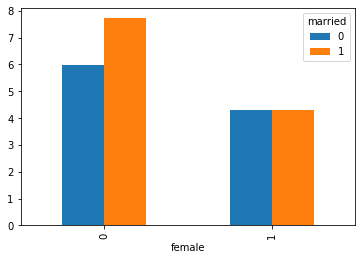

In [135]:
pvt.plot.bar()

## Применение функций

In [136]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


* Apply

In [137]:
df.apply(np.max)

wage        77.72
exper       48.00
union        1.00
goodhlth     1.00
black        1.00
female       1.00
married      1.00
service      1.00
educ        17.00
looks        5.00
dtype: float64

In [138]:
df.apply(lambda x: x.max() - x.min())

wage        76.7
exper       48.0
union        1.0
goodhlth     1.0
black        1.0
female       1.0
married      1.0
service      1.0
educ        12.0
looks        4.0
dtype: float64

In [139]:
df['female']

0       1
1       1
2       1
3       0
4       0
       ..
1255    1
1256    1
1257    1
1258    1
1259    1
Name: female, Length: 1260, dtype: int64

In [140]:
df['female'].apply(lambda x: 'Male' if x == 0 else 'Female')

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
1255    Female
1256    Female
1257    Female
1258    Female
1259    Female
Name: female, Length: 1260, dtype: object

In [141]:
df['female']

0       1
1       1
2       1
3       0
4       0
       ..
1255    1
1256    1
1257    1
1258    1
1259    1
Name: female, Length: 1260, dtype: int64

In [142]:
df['female'] = df['female'].apply(lambda x: 'Male' if x == 0 else 'Female')

In [143]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,Female,1,1,14,4
1,4.28,28,0,1,0,Female,1,0,12,3
2,7.96,35,0,1,0,Female,0,0,10,4
3,11.57,38,0,1,0,Male,1,1,16,3
4,11.42,27,0,1,0,Male,1,0,16,3


* Map

In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')

In [145]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [146]:
d = {0:'Male', 1:'Female'}
df['female'].map(d)

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
1255    Female
1256    Female
1257    Female
1258    Female
1259    Female
Name: female, Length: 1260, dtype: object

In [147]:
df['female'].map(lambda x: 'Male' if x == 0 else 'Female')

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
1255    Female
1256    Female
1257    Female
1258    Female
1259    Female
Name: female, Length: 1260, dtype: object